<p style="font-size:40px"><b> INTRODUCTION TO DATA SCIENCE - IRIS 
    

  <p style="font-size:20px"> 

<b> Importing libraries

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
data = pd.read_csv(r'/Users/balajir/Documents/MSC/Sem 2/Introduction to Data Science/Assignment/Iris.csv')

<b> Analysing Dataset

In [75]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [76]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


<b>Scatter Plots

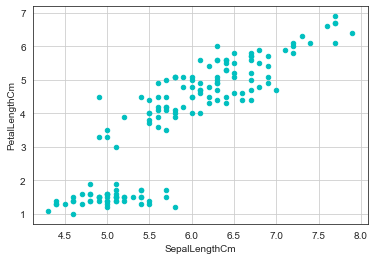

In [78]:

data.plot(kind ="scatter",
          x ='SepalLengthCm',
          y ='PetalLengthCm',c = 'c')
plt.grid()
plt.savefig('Analysis1.pdf')

<AxesSubplot:>

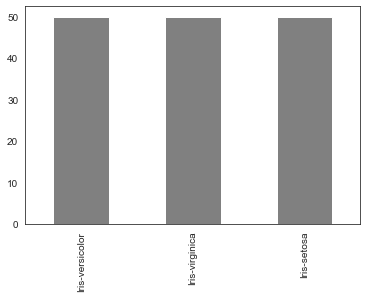

In [79]:
data['Species'].value_counts().plot(kind='bar', color = 'Grey')

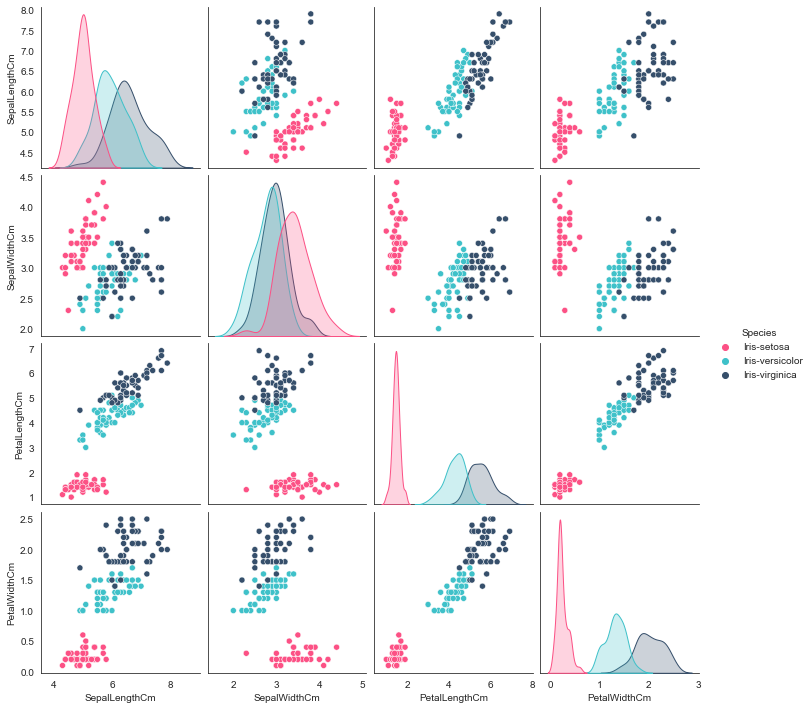

In [80]:
color_pallete = ['#fc5185', '#3fc1c9', '#364f6b']
sns.set_palette(color_pallete)
sns.set_style("white")
sns.pairplot(data.drop(['Id'],axis=1),hue='Species')
plt.savefig('Analysis.pdf')
plt.show()

<b>Correlation within dataset

In [81]:
data1= data.iloc[:,1:5]

data1.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


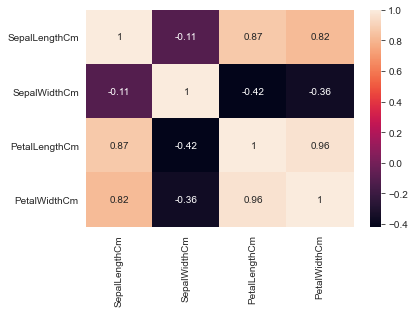

In [82]:
plt.figure() 
sns.heatmap(data1.corr(),annot=True)

plt.savefig('correl.pdf')
plt.show()


<b> Assigning x & y variables

In [83]:
x = data.iloc[:,1:5]
y = data.iloc[:,5]


<b>Data split

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=10)


<b> Decision Tree

In [85]:
from sklearn import tree
dt= tree.DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
dt.score(X_test,y_test)

0.9777777777777777

<b> Confusion matrix - Decision Tree

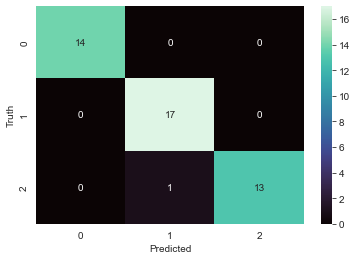

In [86]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix , classification_report
cfdt = metrics.confusion_matrix(y_test,y_pred)
sns.heatmap(cfdt, annot=True,cmap="mako")
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.savefig('DT_CF.pdf')

<b> Cross validation - Decision Tree (10 fold)

In [87]:
from sklearn.model_selection import cross_val_score
scores_dt = cross_val_score(dt, X_train, y_train, cv=10)
print("Mean:", scores_dt.mean())
scores_dt

Mean: 0.9045454545454545


array([0.81818182, 0.90909091, 0.90909091, 0.90909091, 1.        ,
       1.        , 0.6       , 1.        , 0.9       , 1.        ])

<b> Precision, recall, F1score - Decision tree

In [88]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.94      1.00      0.97        17
 Iris-virginica       1.00      0.93      0.96        14

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



<b> Logistic regression

In [89]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter= 1000)
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

1.0

In [90]:
y_pred_lr = lr.predict(X_test)

<b>Confusion matrix - Logistic regression

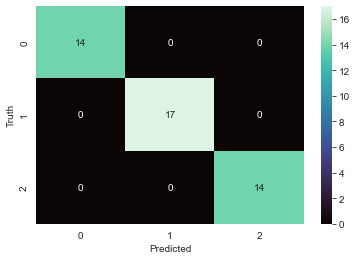

In [91]:
cflr= metrics.confusion_matrix(y_test,y_pred_lr)
sns.heatmap(cflr, annot=True,cmap="mako")
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.savefig('LR_CF.pdf')

<b> Precision, recall, F1score - Logistic regression

In [92]:
print(classification_report(y_test, y_pred_lr))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      1.00      1.00        17
 Iris-virginica       1.00      1.00      1.00        14

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



<b> Cross validation - Logistic Regression (10 fold)

In [93]:
scores_lr = cross_val_score(lr, X_train, y_train, cv=10)
print("Mean:", scores_lr.mean())
scores_lr

Mean: 0.9527272727272728


array([0.90909091, 0.90909091, 1.        , 0.90909091, 1.        ,
       1.        , 0.9       , 1.        , 0.9       , 1.        ])

<b> Random Forest

In [94]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf.score(X_test,y_test)

0.9777777777777777

In [95]:
y_pred_rf = rf.predict(X_test)

<b>Confusion matrix - Random Forest

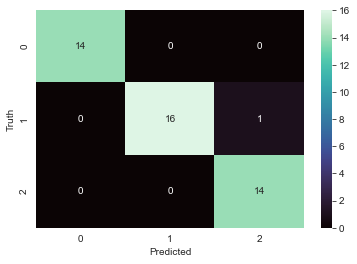

In [96]:
cfrf= metrics.confusion_matrix(y_test,y_pred_rf)
sns.heatmap(cfrf, annot=True,cmap="mako")
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.savefig('RF_CF.pdf')

<b> Precision, recall, F1score - Linear regression

In [97]:
print(classification_report(y_test, y_pred_rf))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      0.94      0.97        17
 Iris-virginica       0.93      1.00      0.97        14

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



<b> Cross validation - Random forest (10 fold)

In [98]:
scores_rf = cross_val_score(rf, X_train, y_train, cv=10)
print("Mean:", scores_rf.mean())
scores_rf

Mean: 0.9236363636363636


array([0.90909091, 0.90909091, 0.90909091, 0.90909091, 1.        ,
       0.9       , 0.8       , 1.        , 0.9       , 1.        ])

<b>Converting Precision, recall, f1score to Data frame

In [99]:
rf_clas = classification_report(y_test, y_pred_rf, output_dict= True)
rf_clas_df = pd.DataFrame(rf_clas).transpose()
dt_clas = classification_report(y_test, y_pred, output_dict= True)
dt_clas_df = pd.DataFrame(dt_clas).transpose()
lr_clas = classification_report(y_test, y_pred_lr, output_dict= True)
lr_clas_df = pd.DataFrame(lr_clas).transpose()
lr_clas_df

,precision,recall,f1-score,support
Iris-setosa,1.0,1.0,1.0,14.0
Iris-versicolor,1.0,1.0,1.0,17.0
Iris-virginica,1.0,1.0,1.0,14.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,45.0
weighted avg,1.0,1.0,1.0,45.0


<b> Final scores

In [100]:
class_report = (rf_clas_df.iloc[4,0:3],lr_clas_df.iloc[4,0:3],dt_clas_df.iloc[4,0:3])
class_report1= pd.DataFrame(class_report)
new_header =['Random Forest','Logistic Regression','Decsion Tree']
class_report1['Classifier'] = new_header
class_report1 = class_report1.reindex(columns=['Classifier','precision','recall','f1-score'])
class_report1

,Classifier,precision,recall,f1-score
macro avg,Random Forest,0.977778,0.980392,0.978405
macro avg,Logistic Regression,1.000000,1.000000,1.000000
macro avg,Decsion Tree,0.981481,0.976190,0.978131


<b> all classifier scores

In [101]:
Classifier_scores = pd.DataFrame({
    'Model': ['Decision Tree','LogisticRegression','Random Forest'],
    'Score': [dt.score(X_test,y_test),lr.score(X_test,y_test),rf.score(X_test,y_test)]})
Classifier_scores.sort_values(by='Score', ascending=False)

,Model,Score
1,LogisticRegression,1.000000
0,Decision Tree,0.977778
2,Random Forest,0.977778


<b> Cross validation ranking

In [102]:
Classifier_cv = pd.DataFrame({
    'Model': ['Decision Tree','LogisticRegression','Random Forest'],
    'cv_Score': [scores_rf.mean(),scores_lr.mean(),scores_dt.mean()]})
Classifier_cv.sort_values(by='cv_Score', ascending=False)

,Model,cv_Score
1,LogisticRegression,0.952727
0,Decision Tree,0.923636
2,Random Forest,0.904545


<p style="font-size:20px">By the above scores and models <i> Logistic regression </i> is the best classifier.